# **1. 논리 회귀**
논리 회귀(Logistic Regression)는 주어진 입력 데이터를 기반으로 두 가지 이상의 범주로 분류하는 지도 학습 알고리즘입니다. 주로 이진 분류 문제에 사용되며, 입력 변수의 선형 결합을 통해 특정 사건이 발생할 확률을 예측합니다. 이 알고리즘은 시그모이드(Sigmoid) 함수 또는 로지스틱 함수라는 비선형 함수를 사용하여 예측값을 0과 1 사이의 확률로 변환합니다. 모델의 결과는 일반적으로 특정 임계값(예: 0.5)을 기준으로 두 범주 중 하나로 분류됩니다. 예를 들어, 이메일이 스팸인지 아닌지를 판별하거나 환자의 병 진단 여부를 예측하는 데 사용될 수 있습니다. 논리 회귀는 계산이 비교적 간단하고 해석이 용이하여 머신러닝에서 널리 사용되는 알고리즘입니다.

### **※ 시그모이드 함수**
시그모이드 함수(Sigmoid Function)는 입력 값을 받아서 이를 0과 1 사이의 값으로 변환하는 수학 함수입니다. 주로 확률을 예측해야 하는 문제에서 사용됩니다. 논리 회귀(Logistic Regression)와 인공신경망(Artificial Neural Network)에서 매우 중요한 역할을 합니다. (e: 자연 상수로, 약 2.718입니다.)

<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdna%2FyCiui%2FbtsLCKSniUS%2FAAAAAAAAAAAAAAAAAAAAAEHdiMoiThP7L2lJ8A-CnrzNeM10c6zfTgmHTHj56XEs%2Fimg.png%3Fcredential%3DyqXZFxpELC7KVnFOS48ylbz2pIh7yKj8%26expires%3D1753973999%26allow_ip%3D%26allow_referer%3D%26signature%3DZq%252FVl9oN76xPdnYb36JPiY1SX5Q%253D'>

<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdna%2FcVJtIu%2FbtsLEhnV5OU%2FAAAAAAAAAAAAAAAAAAAAAHI-wEM4U3e9ckJoaPzazzkW8j6ck3U8qT0Nj77fXVdV%2Fimg.png%3Fcredential%3DyqXZFxpELC7KVnFOS48ylbz2pIh7yKj8%26expires%3D1753973999%26allow_ip%3D%26allow_referer%3D%26signature%3DVByhXA%252B3Ax7O3DxHCUmM%252F0iyk7w%253D' width=300>

# **2. 단항 논리 회귀**
단항 논리 회귀 (Univariate Logistic Regression)는 하나의 독립 변수(입력 변수)를 사용하여 이진 분류 문제를 해결하는 논리 회귀(Logistic Regression)의 한 형태입니다. 예를 들어, 학생의 하루 공부 시간(독립 변수)에 따라 시험 합격 여부(종속 변수: 합격/불합격)를 예측하는 경우가 여기에 해당합니다. 단항 논리 회귀는 입력 변수의 값을 시그모이드(Sigmoid) 함수에 전달하여 해당 사건(예: 합격)이 발생할 확률(0과 1 사이의 값)을 계산합니다. 이후 이 확률 값이 특정 임계값(일반적으로 0.5)을 초과하면 한 클래스로, 그렇지 않으면 다른 클래스로 분류합니다. 단항 논리 회귀는 간단하면서도 직관적이어서 이진 분류 문제를 설명하고 해석하는 데 자주 사용됩니다.

In [ ]:
import torch
import torch.nn as nn

x = torch.tensor([1.0, 2.0, 3.0])
w = torch.tensor([0.1, 0.2, 0.3])
b = torch.tensor(0.5)

# z = W1*x1 + W2*x2 + W3*x3 + b
# z = 0.1*1.0 + 0.2*2.0 + 0.3*3.0 + 0.5
# print(z)         # 1.9
z = torch.dot(w, x) + b
print(z)


tensor(1.9000)


In [ ]:
import torch.optim as optim
import matplotlib.pyplot as plt

torch.manual_seed(2025)

x_train = torch.FloatTensor([[0], [1], [3], [5], [8], [11], [15], [20]])  # 공부한 시간
y_train = torch.FloatTensor([[0], [0], [0], [0], [1], [1], [1], [1]])        # 자격증 취득 여부

model = nn.Sequential(
    nn.Linear(1, 1),
    nn.Sigmoid()
)

y_pred = model(x_train)
y_pred

tensor([[0.7050],
        [0.7757],
        [0.8788],
        [0.9382],
        [0.9788],
        [0.9929],
        [0.9984],
        [0.9997]], grad_fn=<SigmoidBackward0>)

In [ ]:
model = nn.Sequential(
    nn.Linear(1, 1),
    nn.Sigmoid()
)

model

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): Sigmoid()
)

In [ ]:
list(model.parameters())   # 리스트 형태로 확인

[Parameter containing:
 tensor([[-0.4199]], requires_grad=True),
 Parameter containing:
 tensor([-0.2018], requires_grad=True)]

In [ ]:
y_pred = model(x_train)
y_pred

tensor([[4.4972e-01],
        [3.4939e-01],
        [1.8823e-01],
        [9.1004e-02],
        [2.7620e-02],
        [7.9943e-03],
        [1.5001e-03],
        [1.8401e-04]], grad_fn=<SigmoidBackward0>)

### **BCE 손실 함수**

Binary Cross Entropy (BCE)는 이진 분류 문제에서 모델이 예측한 확률 분포와 실제 정답 레이블 사이의 차이를 측정하는 손실 함수(Loss Function)입니다. BCE는 예측된 확률 값과 실제 값(0 또는 1) 사이의 차이를 로그 확률로 변환하여 손실을 계산합니다.

<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdna%2FoslY0%2FbtsLCHawxeG%2FAAAAAAAAAAAAAAAAAAAAAGHwwEFSYt27yqPADmRDoznSpe0WrSCaiLZ08tu_hg0t%2Fimg.png%3Fcredential%3DyqXZFxpELC7KVnFOS48ylbz2pIh7yKj8%26expires%3D1753973999%26allow_ip%3D%26allow_referer%3D%26signature%3DvtxJlPHa4ZEAq8fXswXxGznlPfg%253D' width=500>
<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdna%2FRHljk%2FbtsLC1T532t%2FAAAAAAAAAAAAAAAAAAAAANNo1_hcidkBatvuIvZjoGiegZrbRwDcgJYTOkZyhyzC%2Fimg.png%3Fcredential%3DyqXZFxpELC7KVnFOS48ylbz2pIh7yKj8%26expires%3D1753973999%26allow_ip%3D%26allow_referer%3D%26signature%3DESb4Qt4Q%252F9k2lA3fQd0FaTDiZj4%253D' width=450>

In [ ]:
loss = nn.BCELoss()(y_pred, y_train)
loss

tensor(3.1065, grad_fn=<BinaryCrossEntropyBackward0>)

In [ ]:
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [ ]:
epochs = 1000

for epoch in range(epochs + 1):
    y_pred = model(x_train)
    loss = nn.BCELoss()(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f'Epoch: {epoch}/{epochs} Loss: {loss:.6f}')


x_test = torch.FloatTensor([[10]])
y_pred = model(x_test)
print(y_pred)

y_bool = (y_pred >= 0.5).float()
y_bool


Epoch: 0/1000 Loss: 3.106515
Epoch: 100/1000 Loss: 0.441438
Epoch: 200/1000 Loss: 0.406265
Epoch: 300/1000 Loss: 0.376375
Epoch: 400/1000 Loss: 0.350810
Epoch: 500/1000 Loss: 0.328791
Epoch: 600/1000 Loss: 0.309688
Epoch: 700/1000 Loss: 0.292996
Epoch: 800/1000 Loss: 0.278307
Epoch: 900/1000 Loss: 0.265296
Epoch: 1000/1000 Loss: 0.253699
tensor([[0.8484]], grad_fn=<SigmoidBackward0>)


tensor([[1.]])

**로지스틱 회귀를 이용한 공부시간에 따른 자격증 합격 여부 예측**

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim

torch.manual_seed(2025)


# 1. 데이터 정의
x_train = torch.FloatTensor([[0], [1], [3], [5], [8], [11], [15], [20]])  # 공부한 시간
y_train = torch.FloatTensor([[0], [0], [0], [0], [1], [1], [1], [1]])        # 자격증 취득 여부


# 2. 모델  정의: 선형회귀 + 시그모이드 함수 = 로지스틱 회귀
model = nn.Sequential(
    nn.Linear(1, 1),    # 입력 1개 → 출력 1개. 즉, y = wx + b 계산
    nn.Sigmoid()        # 출력값을 0~1 사이로 정규화
)


# 3. 손실 함수, 옵티마이저 정의
loss_fn = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)


# 4. 학습 반복
epochs = 1000
for epoch in range(epochs + 1):
    # 예측 및 손실 계산
    y_pred = model(x_train)
    loss = loss_fn(y_pred, y_train)

    # 역전파 및 업데이트
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # 중간 결과 출력
    if epoch % 100 == 0:
        print(f'Epoch: {epoch}/{epochs} Loss: {loss:.6f}')


# 5. 학습된 모델의 파라미터 확인
print("\n 학습된 파라미터:")
for name, param in model.named_parameters():
    print(f"{name}: {param.data.view(-1).tolist()}")


# 6. 새 데이터에 대한 예측 (공부 시간: 4시간)
x_test = torch.FloatTensor([[4]])
y_test_pred = model(x_test)

print(f"4시간 공부한 경우 자격증 취득 확률: {y_test_pred.item():.4f}")


# 7. 확률 값을 기준으로 이진 분류 (0.5이상이면  합격으로 간주)
y_class = (y_test_pred >= 0.5).float()
print(f"합격 여부 예측 결과 (0: 불합격, 1: 합격): {int(y_class.item())}")

Epoch: 0/1000 Loss: 0.955088
Epoch: 100/1000 Loss: 0.656269
Epoch: 200/1000 Loss: 0.587461
Epoch: 300/1000 Loss: 0.529375
Epoch: 400/1000 Loss: 0.480471
Epoch: 500/1000 Loss: 0.439265
Epoch: 600/1000 Loss: 0.404423
Epoch: 700/1000 Loss: 0.374805
Epoch: 800/1000 Loss: 0.349462
Epoch: 900/1000 Loss: 0.327626
Epoch: 1000/1000 Loss: 0.308673

 학습된 파라미터:
0.weight: [0.278033971786499]
0.bias: [-1.1653181314468384]
4시간 공부한 경우 자격증 취득 확률: 0.4867
합격 여부 예측 결과 (0: 불합격, 1: 합격): 0


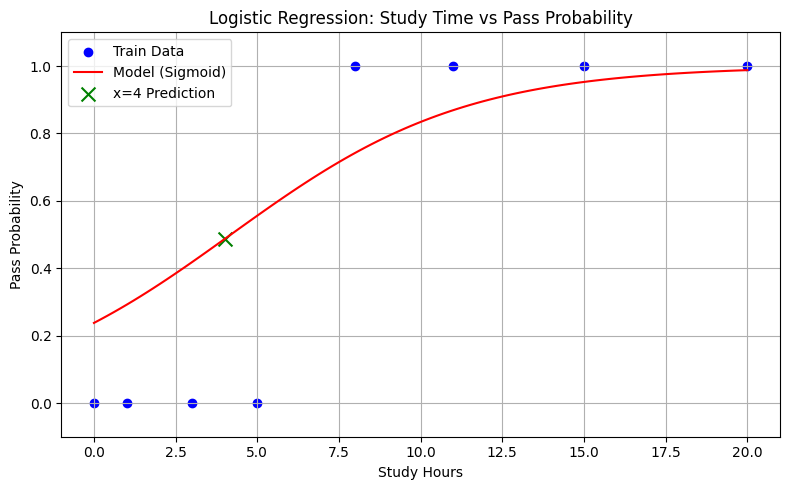

In [8]:
import matplotlib.pyplot as plt

# 시각화용 입력값 (0~20 사이를 100개로 쪼갠 값)
x_plot = torch.linspace(0, 20, 100).unsqueeze(1)
with torch.no_grad():
    y_plot = model(x_plot)

# 학습 데이터 예측 결과
with torch.no_grad():
    y_train_pred = model(x_train)

# 그래프 그리기
plt.figure(figsize=(8, 5))
plt.scatter(x_train.numpy(), y_train.numpy(), label='Train Data', color='blue')  # 실제 데이터
plt.plot(x_plot.numpy(), y_plot.numpy(), label='Model (Sigmoid)', color='red')  # 시그모이드 곡선
plt.scatter(x_test.numpy(), y_test_pred.detach().numpy(), color='green', label='x=4 Prediction', marker='x', s=100)

plt.title('Logistic Regression: Study Time vs Pass Probability')
plt.xlabel('Study Hours')
plt.ylabel('Pass Probability')
plt.grid(True)
plt.legend()
plt.ylim(-0.1, 1.1)
plt.tight_layout()
plt.show()


# **다항 논리 회귀**

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim

# 1. 데이터 정의 (입력: 4개 특성, 출력: 클래스 레이블 0~2)
x_train = torch.FloatTensor([
    [1, 2, 1, 1],
    [2, 1, 3, 2],
    [3, 1, 3, 4],
    [4, 2, 5, 5],
    [1, 6, 5, 5],
    [1, 4, 5, 8],
    [1, 7, 7, 7],
    [2, 8, 7, 8],
    [2, 7, 6, 7],
    [2, 6, 6, 6]
])

y_train = torch.LongTensor([0, 0, 0, 1, 1, 1, 2, 2, 2, 2])

print(f" 입력 크기: {x_train.shape}, 라벨 크기: {y_train.shape}")


# 2. 모델 정의: 입력 4차원 → 출력 3차원 (클래스 수)
model = nn.Linear(4, 3)
print("\n 모델 구조:")
print(model)


# 3. 손실 함수 및 옵티마이저 설정
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)


# 4. 모델 학습
epochs = 10000
for epoch in range(epochs + 1):
    # 순전파
    y_pred = model(x_train)  # 로짓(logit) 출력
    loss = loss_fn(y_pred, y_train)

    # 역전파
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f"Epoch {epoch:5d}/{epochs} | Loss: {loss.item():.6f}")


# 5. 학습된 파라미터 확인
print("\n 학습된 파라미터:")
for name, param in model.named_parameters():
    print(f"{name}: {param.data}")


# 6. 새 입력값에 대한 예측
x_test = torch.FloatTensor([[2, 1, 3, 3]])
y_test_logits = model(x_test)  # softmax 전 결과


# 7. 소프트맥스 확률 계산
y_prob = nn.Softmax(dim=1)(y_test_logits)
print(f"\n 예측 확률:")
for i, prob in enumerate(y_prob[0]):
    print(f"클래스 {i}: {prob.item():.2f}")


# 8. 예측 클래스 선택
y_class = torch.argmax(y_prob, dim=1)
print(f"\n 최종 예측 클래스: {y_class.item()}번")


 입력 크기: torch.Size([10, 4]), 라벨 크기: torch.Size([10])

 모델 구조:
Linear(in_features=4, out_features=3, bias=True)
Epoch     0/10000 | Loss: 1.967613
Epoch   100/10000 | Loss: 0.872644
Epoch   200/10000 | Loss: 0.762529
Epoch   300/10000 | Loss: 0.716454
Epoch   400/10000 | Loss: 0.686174
Epoch   500/10000 | Loss: 0.662485
Epoch   600/10000 | Loss: 0.642596
Epoch   700/10000 | Loss: 0.625351
Epoch   800/10000 | Loss: 0.610145
Epoch   900/10000 | Loss: 0.596596
Epoch  1000/10000 | Loss: 0.584434
Epoch  1100/10000 | Loss: 0.573449
Epoch  1200/10000 | Loss: 0.563474
Epoch  1300/10000 | Loss: 0.554368
Epoch  1400/10000 | Loss: 0.546018
Epoch  1500/10000 | Loss: 0.538325
Epoch  1600/10000 | Loss: 0.531208
Epoch  1700/10000 | Loss: 0.524595
Epoch  1800/10000 | Loss: 0.518427
Epoch  1900/10000 | Loss: 0.512655
Epoch  2000/10000 | Loss: 0.507233
Epoch  2100/10000 | Loss: 0.502124
Epoch  2200/10000 | Loss: 0.497295
Epoch  2300/10000 | Loss: 0.492719
Epoch  2400/10000 | Loss: 0.488371
Epoch  2500/10

/tmp/ipython-input-12-3840379403.py:33: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-12-3840379403.py:33: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-12-3840379403.py:33: UserWarning: Glyph 53364 (\N{HANGUL SYLLABLE KEUL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-12-3840379403.py:33: UserWarning: Glyph 47000 (\N{HANGUL SYLLABLE RAE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-12-3840379403.py:33: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-12-3840379403.py:33: UserWarning: Glyph 47784 (\N{HANGUL SYLLABLE MO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-12-3840379403.py:33: UserWarning: Glyph 45944 (\N{HANGUL SYLLABLE DEL}) missing from font(s) DejaVu Sans.


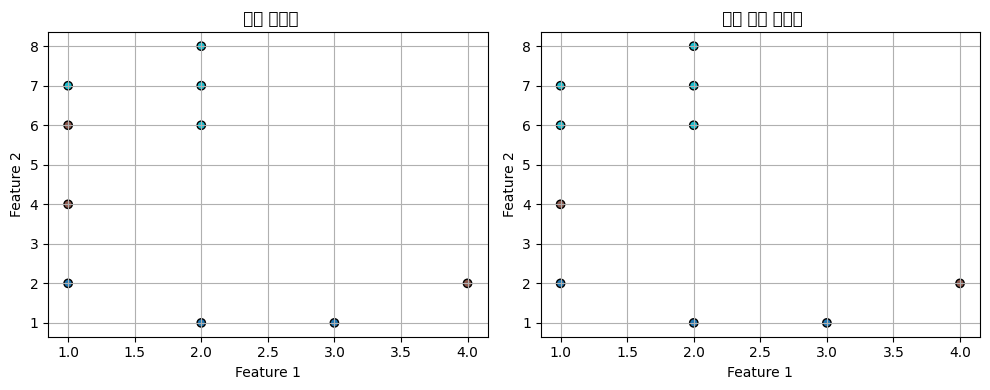

In [12]:
import matplotlib.pyplot as plt

# 1. 전체 학습 데이터에 대해 예측 수행
with torch.no_grad():
    y_pred_logits = model(x_train)
    y_pred_class = torch.argmax(y_pred_logits, dim=1)

# 2. x축: 첫 번째 특성, y축: 두 번째 특성만 사용 (예시)
x = x_train[:, 0].numpy()
y = x_train[:, 1].numpy()
labels = y_train.numpy()
preds = y_pred_class.numpy()

# 3. 정답 분포 시각화
plt.figure(figsize=(10, 4))

# 실제 정답 분포
plt.subplot(1, 2, 1)
plt.scatter(x, y, c=labels, cmap='tab10', edgecolors='k')
plt.title(" 실제 클래스")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)

# 예측 분포
plt.subplot(1, 2, 2)
plt.scatter(x, y, c=preds, cmap='tab10', edgecolors='k')
plt.title(" 모델 예측 클래스")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)

plt.tight_layout()
plt.show()


좌측 그래프: 학습 데이터의 실제 정답 클래스

우측 그래프: 학습 데이터에 대한 모델 예측 클래스

색이 일치할수록 모델이 잘 분류한 것입니다.

2D 특성 시각화이므로 설명력이 제한되지만, 분포와 분류 경향을 파악하기엔 좋습니다.

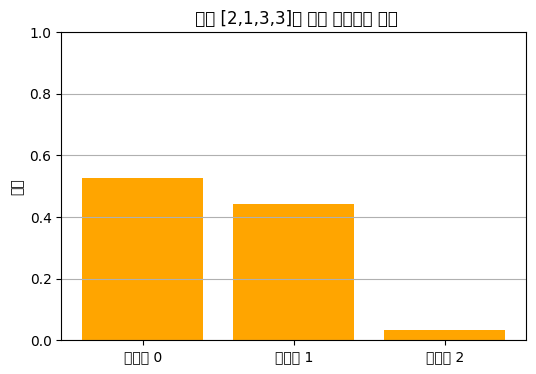

In [14]:
# 1개의 테스트 샘플에 대한 확률 막대 시각화
classes = ['클래스 0', '클래스 1', '클래스 2']
probs = y_prob[0].detach().numpy()

plt.figure(figsize=(6, 4))
plt.bar(classes, probs, color='orange')
plt.title(" 입력 [2,1,3,3]에 대한 클래스별 확률")
plt.ylabel("확률")
plt.ylim(0, 1.0)
plt.grid(True, axis='y')
plt.show()
